In [ ]:
pip install lazypredict

In [ ]:
# setting default number of rows and columns to be displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # No limit on column width
pd.set_option('display.width', 2000)  # Set a high enough width to prevent wrapping
pd.set_option('display.colheader_justify', 'center')  # Center column headers for readability

# adjusting CSS for the Jupyter Notebook, to avoid text-wrapping
from IPython.display import display, HTML
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

In [ ]:

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load the dataset
df = pd.read_csv('fe_data_all.csv')
df.head()

,date,daily_treasury_rate,inflation_expected_rate,sp500_closing,BTC,is_holiday,day_of_week,day_of_year,month_of_year,year,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos
0,10-11-17,1.03,1.88,2582.30,6618.14,1,4,314,11,2017,-0.43,-0.90,-0.77,0.64,-0.50,0.87
1,11-11-17,1.03,1.88,2582.30,6357.60,1,5,315,11,2017,-0.97,-0.22,-0.76,0.65,-0.50,0.87
2,12-11-17,1.03,1.88,2582.30,5950.07,1,6,316,11,2017,-0.78,0.62,-0.75,0.66,-0.50,0.87
3,13-11-17,1.04,1.88,2584.84,6559.49,0,0,317,11,2017,0.00,1.00,-0.74,0.68,-0.50,0.87
4,14-11-17,1.04,1.87,2578.87,6635.75,0,1,318,11,2017,0.78,0.62,-0.72,0.69,-0.50,0.87


In [ ]:
# Ensure LazyPredict is installed
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['BTC'])
y = df['BTC']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Use LazyPredict to compare models
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance
print(models)

100%|██████████| 42/42 [00:11<00:00,  3.51it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 2069, number of used features: 14
[LightGBM] [Info] Start training from score 26958.230189
                               Adjusted R-Squared  R-Squared   RMSE    Time Taken
Model                                                                            
ExtraTreesRegressor                   1.00           1.00      984.33     1.01   
RandomForestRegressor                 1.00           1.00     1070.92     2.19   
BaggingRegressor                      1.00           1.00     1096.10     0.19   
LGBMRegressor                         1.00           1.00     1323.38     0.12   
HistGradientBoostingRegressor         1.00           1.00     1347.76     0.27   
DecisionTreeRegre

In [ ]:
df.head()

,daily_treasury_rate,inflation_expected_rate,sp500_closing,BTC,is_holiday,day_of_week,day_of_year,month_of_year,year,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos
date,,,,,,,,,,,,,,,
2017-10-11,1.03,1.88,2582.30,6618.14,1,4,314,11,2017,-0.43,-0.90,-0.77,0.64,-0.50,0.87
2017-11-11,1.03,1.88,2582.30,6357.60,1,5,315,11,2017,-0.97,-0.22,-0.76,0.65,-0.50,0.87
2017-12-11,1.03,1.88,2582.30,5950.07,1,6,316,11,2017,-0.78,0.62,-0.75,0.66,-0.50,0.87
2017-11-13,1.04,1.88,2584.84,6559.49,0,0,317,11,2017,0.00,1.00,-0.74,0.68,-0.50,0.87
2017-11-14,1.04,1.87,2578.87,6635.75,0,1,318,11,2017,0.78,0.62,-0.72,0.69,-0.50,0.87


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the dataset
df = df
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

# Define target and exogenous variables
target = df['BTC']
exog = df.drop(columns=['BTC'])

# Split into train and test sets
train_size = int(len(df) * 0.8)
train_target, test_target = target[:train_size], target[train_size:]
train_exog, test_exog = exog[:train_size], exog[train_size:]

# Fit the SARIMAX model
model = SARIMAX(train_target, exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = model.fit(disp=False)

# Make predictions
predictions = sarimax_result.predict(start=len(train_target), end=len(df) - 1, exog=test_exog)

# Evaluate the model
rmse = mean_squared_error(test_target, predictions)
print(f"SARIMAX RMSE: {rmse}")

SARIMAX RMSE: 63553520.00498454


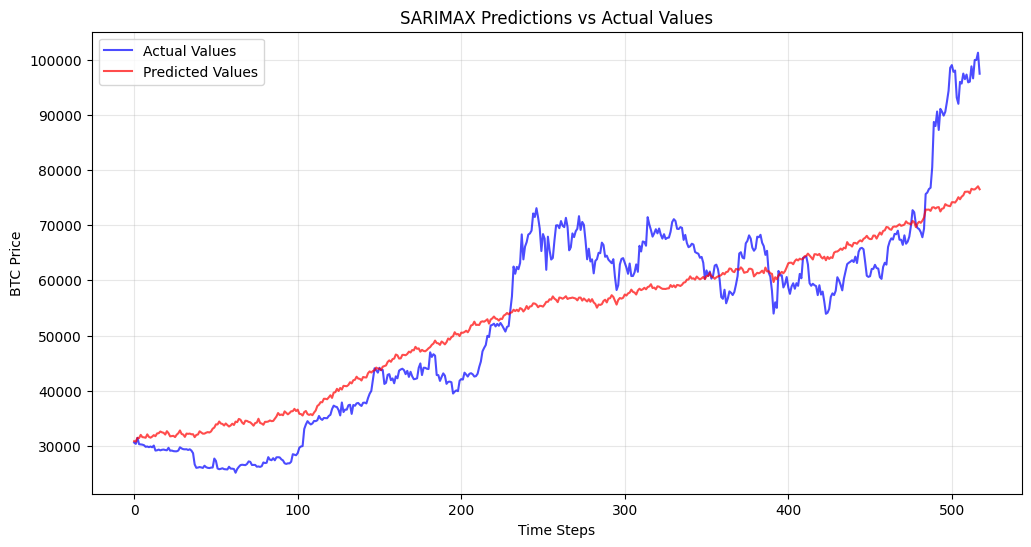

In [ ]:
import matplotlib.pyplot as plt

# Assuming `predictions` and `test_target` are defined from the code provided.

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_target.reset_index(drop=True), label='Actual Values', color='blue', alpha=0.7)
plt.plot(predictions.reset_index(drop=True), label='Predicted Values', color='red', alpha=0.7)
plt.title('SARIMAX Predictions vs Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('BTC Price')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# Load and preprocess the dataset
df = df

scaled_data = df

def create_sequences(data, target_col, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        # Select all rows for the sequence and columns except the target column for X
        X.append(data.iloc[i:i + sequence_length, data.columns != target_col].values)
        # Select the target column for y
        y.append(data.iloc[i + sequence_length, target_col])
    return np.array(X), np.array(y)


sequence_length = 10
X, y = create_sequences(scaled_data, target_col=4, sequence_length=sequence_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions)
print(f"LSTM RMSE: {rmse}")

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2542 - val_loss: 0.2150
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2227 - val_loss: 0.2147
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2234 - val_loss: 0.2189
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2202 - val_loss: 0.2160
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2153 - val_loss: 0.2152
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2151 - val_loss: 0.2153
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2176 - val_loss: 0.2147
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2134 - val_loss: 0.2147
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2160 - val_loss: 0.2150
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2192 - val_loss: 0.2150
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2035 - val_loss: 0.2164
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2176 - val_l